<a href="https://colab.research.google.com/github/Manjunath727/DLwithTF/blob/master/TimeSeries_Using_TF/W1/TimeSeries_Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def plot_series(time, series, format='-'):
  plt.figure(figsize=(10,6))
  plt.plot(time, series, format)
  plt.xlabel('time')
  plt.ylabel('value')
  plt.grid(True)

In [0]:
def trend(time, slope=0):
  return slope * time

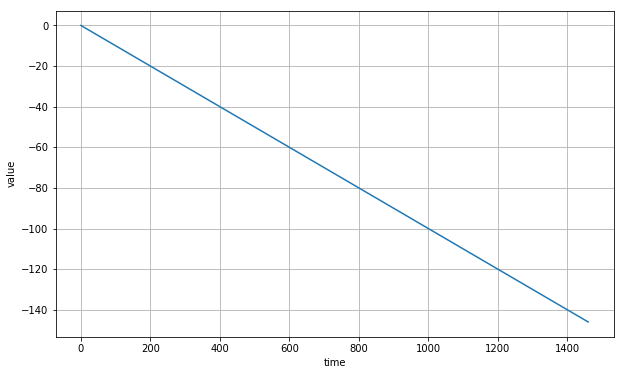

In [18]:
time = np.arange(4*365 + 1)
baseline = 10
series = trend(time, -0.1)
plot_series(time, series)
plt.show()


In [0]:
def seasonal_pattern(season_time):
  return np.where(season_time < 0.4,
                  np.cos(season_time * 2 * np.pi),
                  1/np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time + phase) % period)/period
  print(season_time)
  return amplitude * seasonal_pattern(season_time)

[0.         0.00273973 0.00547945 ... 0.99452055 0.99726027 0.        ]


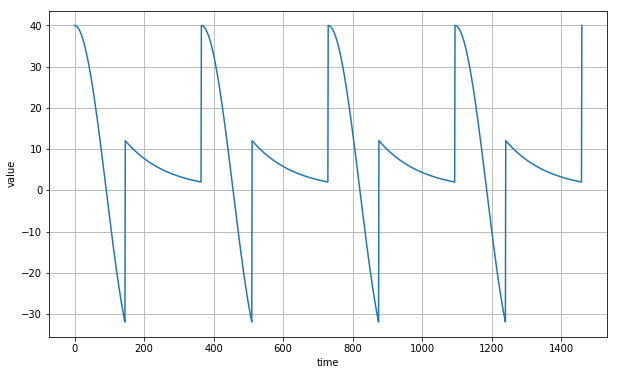

In [20]:
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)
plt.show()

[0.         0.00273973 0.00547945 ... 0.99452055 0.99726027 0.        ]


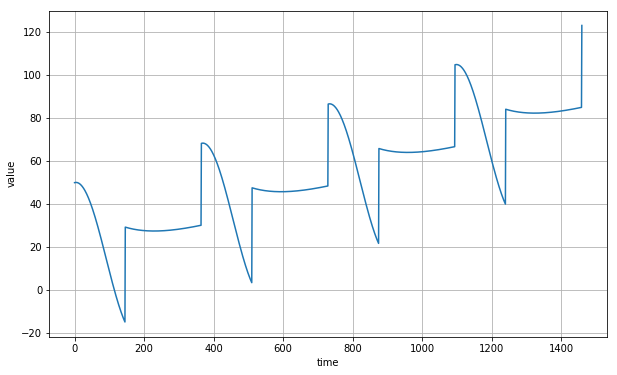

In [21]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
plot_series(time, series)
plt.show()

In [0]:
def noise(time, noise_level, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

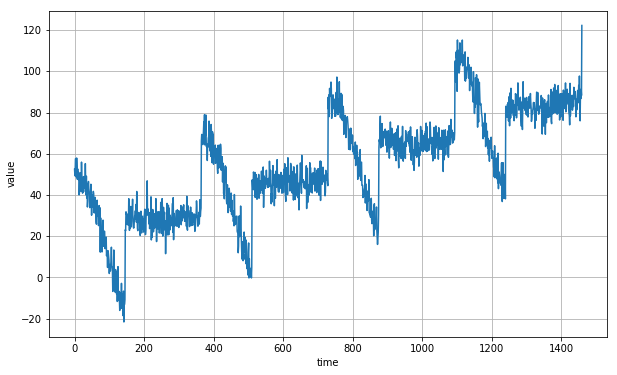

In [23]:
noise_level = 5
noisy_series = series + noise(time, noise_level, seed=42)
plot_series(time, noisy_series)
plt.show()

In [0]:
def autocorrelation1(time, amplitude, seed=None):
  rnd = np.random.RandomState(seed)
  a1 = 0.5
  a2 = -0.1
  ar = rnd.randn(len(time) + 50)
  ar[:50] = 100
  for step in range(50, len(time)+50):
    ar[step] += a1 * ar[step - 50]
    ar[step] += a2 * ar[step - 33]
  return ar[50:] * amplitude

def autocorrelation2(time, amplitude, seed=None):
  rnd = np.random.RandomState(seed)
  a1 = 0.8
  ar = rnd.randn(len(time) + 1)
  for step in range(1, len(time) + 1):
    ar[step] += a1 * ar[step-1]
  return ar[1:] * amplitude

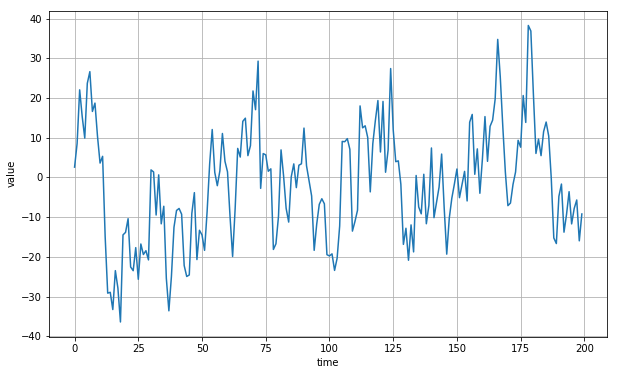

In [25]:
series = autocorrelation2(time, 10, seed=42)
plot_series(time[:200], series[:200])
plt.show()

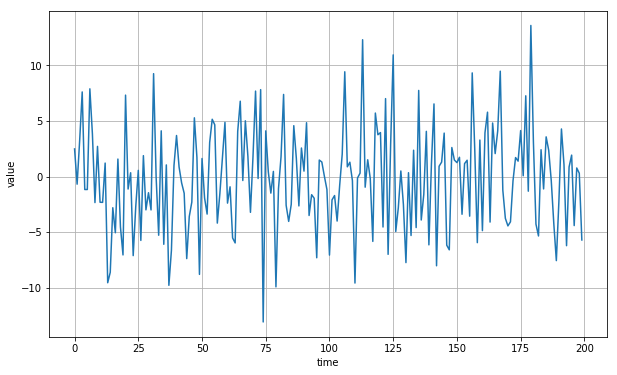

In [26]:
series = noise(time, 5, seed=42)
plot_series(time[:200], series[:200])
plt.show()


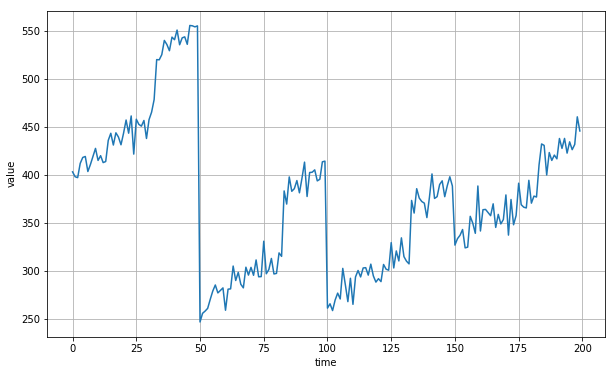

In [27]:
series = autocorrelation1(time, 10, seed=42) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

[0.   0.02 0.04 ... 0.16 0.18 0.2 ]


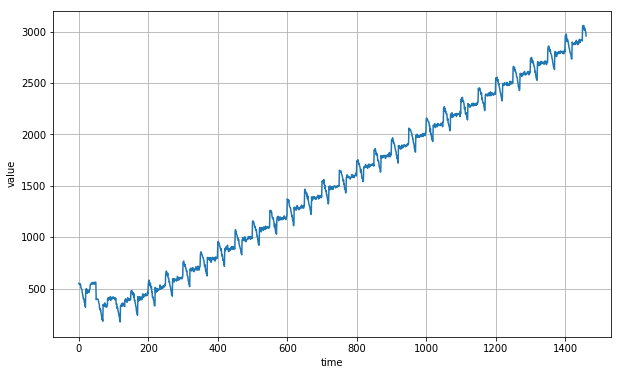

In [28]:
series = autocorrelation1(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time, series)
plt.show()

[0.   0.02 0.04 ... 0.16 0.18 0.2 ]
[0.   0.02 0.04 ... 0.16 0.18 0.2 ]


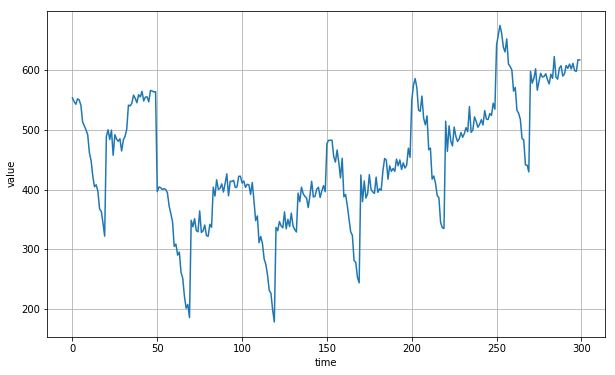

In [29]:
series1 = autocorrelation1(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
series2 = autocorrelation1(time, 5, seed = 42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series1[200:] = series2[200:]
plot_series(time[:300], series[:300])
plt.show()

In [0]:
def impulses(time, num_impulses, amplitude=1, seed=None):
  rnd = np.random.RandomState(seed)
  impulse_indices = rnd.randint(len(time), size=10)
  series = np.zeros(len(time))
  for index in impulse_indices:
    series[index] += rnd.rand() * amplitude
  return series

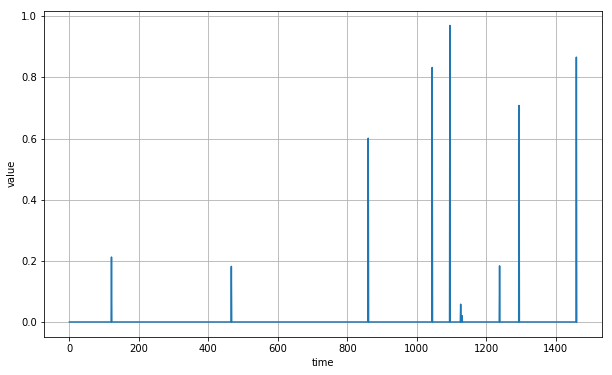

In [36]:
series = impulses(time, 10, seed=42)
plot_series(time, series)
plt.show()

In [0]:
def autocorrelation(source, ps):
  ar = source.copy()
  max_lag = len(ps)
  for step, value in enumerate(source):
    for lag, p in ps.items():
      if step - lag > 0:
        ar[step] += p * ar[step - lag]
  return ar


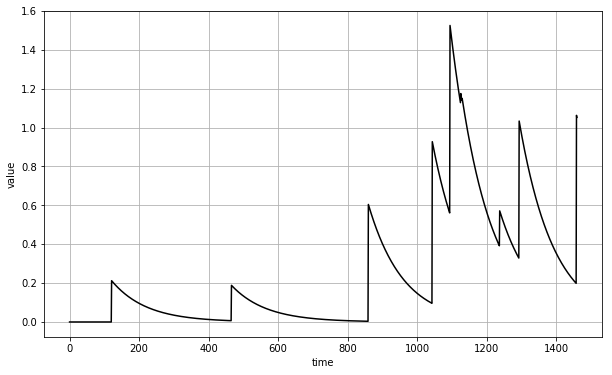

In [40]:
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1:0.99})
plot_series(time, series, 'k-')
plt.show()

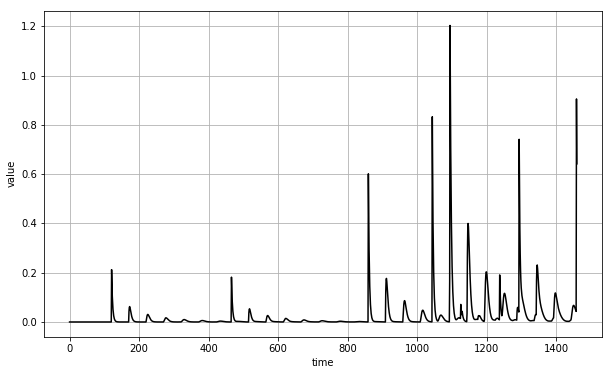

In [41]:
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1:0.70, 50:0.2})
plot_series(time, series, "k-")
plt.show()